In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.python as tf
import sklearn
import scipy

%matplotlib inline

Data Loading

In [128]:
agrolimate_exel = './agroclimate2.xls'
prod_qty_csv = './FAOSTAT_data_prodQTY.csv'
yield_csv = './FAOSTAT_data_panen.csv'
harvested_csv = './FAOSTAT_data_area_harvested.csv'

AGROCLIMATE DATA

NASA/POWER CERES/MERRA2 Native Resolution Monthly and Annual 
Dates (month/day/year): 01/01/1981 through 12/31/2020 
Location: Regional 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = na meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
Parameter(s): 
1. TS                    MERRA-2 Earth Skin Temperature (C) 
2. T2M                   MERRA-2 Temperature at 2 Meters (C) 
3. QV2M                  MERRA-2 Specific Humidity at 2 Meters (g/kg) 
4. RH2M                  MERRA-2 Relative Humidity at 2 Meters (%) 
5. T2MDEW                MERRA-2 Dew/Frost Point at 2 Meters (C) 
6. T2MWET                MERRA-2 Wet Bulb Temperature at 2 Meters (C) 
7. GWETTOP               MERRA-2 Surface Soil Wetness (1) 
8. T2M_MAX               MERRA-2 Temperature at 2 Meters Maximum (C) 
9. T2M_MIN               MERRA-2 Temperature at 2 Meters Minimum (C) 
10. GWETPROF              MERRA-2 Profile Soil Moisture (1) 
11. GWETROOT              MERRA-2 Root Zone Soil Wetness (1) 
12. T2M_RANGE             MERRA-2 Temperature at 2 Meters Range (C) 
13. PRECTOTCORR           MERRA-2 Precipitation Corrected (mm/day) 
14. PRECTOTCORR_SUM       MERRA-2 Precipitation Corrected Sum (mm) 
15. ALLSKY_SFC_LW_DWN     CERES SYN1deg All Sky Surface Longwave Downward Irradiance (W/m^2)

FAOSTAT DATA

1.	Domain Code		        : Kode domain data.
2.	Domain			        : Nama domain data.
3.	Area Code (M49)	        :  Kode area.
4.	Area			        : Nama Negara.
5.	Element Code		    : Kode element.
6.	Element		            : Komponen, Area Harvested.
7.	Item Code (CPC)	        : Kode produk.
8.	Item			        : Nama jenis produk.
9.	Year Code		        : Kode tahun.
10.	Year			        : Tahun.
11.	Unit			        : Satuan unit, Ha (hektar).
12.	Value			        : Nilai data.
13.	Flag			        : Binary (E/A)
14.	Flag Description		: Deskripsi Flag. E = Estimated Value, A = Official Figure


In [129]:
# Reading dataset from source

from pandas import read_csv, read_excel

agrolimate_data = read_excel(agrolimate_exel)
prod_qty_data = read_csv(prod_qty_csv)
yield_data = read_csv(yield_csv)
harvested_data = read_csv(harvested_csv)

In [130]:
# Creating Dataframe

agrolimate_df = pd.DataFrame(agrolimate_data)
prod_qty_df = pd.DataFrame(prod_qty_data)
yield_df = pd.DataFrame(yield_data)
harvested_df = pd.DataFrame(harvested_data)

Droping unnececary column

In [131]:
prod_qty_df = prod_qty_df.filter(['Production Quantity'])
yield_df = yield_df.filter(['Crop Yield'])
harvested_df = harvested_df.filter(['Harvested Area'])
agrolimate_df.drop(columns=['ALLSKY_SFC_LW_DWN', 'Year'], axis=1, inplace=True)

Merge Dataframes into one Dataframe

In [132]:
merge = [agrolimate_df, prod_qty_df, harvested_df, yield_df]

data = pd.concat(merge, axis=1)

In [133]:
data.head()

,TS,T2M,QV2M,RH2M,T2MDEW,T2MWET,GWETTOP,T2M_MAX,T2M_MIN,GWETPROF,GWETROOT,T2M_RANGE,PRECTOTCORR,PRECTOTCORR_SUM,Production Quantity,Harvested Area,Crop Yield
0,25.65,25.72,18.37,89.38,23.73,24.72,0.83,31.25,20.94,0.92,0.84,10.31,6.12,2146.29,3800000,230000,165217
1,25.44,25.52,18.07,88.94,23.45,24.49,0.73,31.48,19.59,0.81,0.71,11.88,4.89,1708.59,4300000,239700,179391
2,25.90,25.98,18.49,88.69,23.84,24.91,0.80,32.08,20.88,0.89,0.80,11.20,6.40,2235.94,4600000,255300,180180
3,25.19,25.30,18.07,90.06,23.46,24.38,0.86,30.87,21.15,0.95,0.89,9.71,6.33,2193.75,6280000,296300,211947
4,25.36,25.48,18.07,89.19,23.45,24.47,0.80,31.50,20.69,0.90,0.82,10.80,6.02,2098.83,6550000,348700,187841


Exploratory Data Analysis & Preprocessing

In [134]:
# checking mising value

data.isnull().sum()

TS                     0
T2M                    0
QV2M                   0
RH2M                   0
T2MDEW                 0
T2MWET                 0
GWETTOP                0
T2M_MAX                0
T2M_MIN                0
GWETPROF               0
GWETROOT               0
T2M_RANGE              0
PRECTOTCORR            0
PRECTOTCORR_SUM        0
Production Quantity    0
Harvested Area         0
Crop Yield             0
dtype: int64

In [135]:
# Checking duplicated data

print(f'Duplicated data in data frame: {data.duplicated().sum()}')

Duplicated data in data frame: 0


In [136]:
# checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TS                   40 non-null     float64
 1   T2M                  40 non-null     float64
 2   QV2M                 40 non-null     float64
 3   RH2M                 40 non-null     float64
 4   T2MDEW               40 non-null     float64
 5   T2MWET               40 non-null     float64
 6   GWETTOP              40 non-null     float64
 7   T2M_MAX              40 non-null     float64
 8   T2M_MIN              40 non-null     float64
 9   GWETPROF             40 non-null     float64
 10  GWETROOT             40 non-null     float64
 11  T2M_RANGE            40 non-null     float64
 12  PRECTOTCORR          40 non-null     float64
 13  PRECTOTCORR_SUM      40 non-null     float64
 14  Production Quantity  40 non-null     int64  
 15  Harvested Area       40 non-null     int64

In [137]:
data.describe()

,TS,T2M,QV2M,RH2M,T2MDEW,T2MWET,GWETTOP,T2M_MAX,T2M_MIN,GWETPROF,GWETROOT,T2M_RANGE,PRECTOTCORR,PRECTOTCORR_SUM,Production Quantity,Harvested Area,Crop Yield
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,4.000000e+01,4.000000e+01,40.000000
mean,25.795750,25.898000,18.770000,90.258500,24.087750,24.993750,0.838000,31.445500,20.970000,0.924000,0.859250,10.47475,6.331750,2213.921000,7.791797e+07,4.483448e+06,178114.475000
std,0.248492,0.252923,0.326339,0.653054,0.285877,0.260716,0.048049,0.351662,0.586712,0.042535,0.062486,0.63084,1.034517,377.122622,8.229456e+07,4.801609e+06,13845.334558
min,25.190000,25.300000,18.070000,88.690000,23.450000,24.380000,0.700000,30.690000,19.430000,0.790000,0.700000,9.50000,4.350000,1492.380000,3.800000e+06,2.300000e+05,151349.000000
25%,25.650000,25.737500,18.602500,89.862500,23.947500,24.887500,0.807500,31.250000,20.662500,0.900000,0.820000,10.06500,5.635000,1956.445000,1.190286e+07,7.474420e+05,170960.500000
50%,25.775000,25.875000,18.800000,90.380000,24.125000,25.000000,0.850000,31.435000,20.985000,0.945000,0.875000,10.41000,6.305000,2206.935000,3.866500e+07,2.107000e+06,172906.500000
75%,25.907500,26.035000,18.935000,90.750000,24.245000,25.132500,0.870000,31.762500,21.342500,0.950000,0.900000,10.76250,6.862500,2413.917500,1.481071e+08,8.537252e+06,185866.000000
max,26.390000,26.480000,19.590000,91.560000,24.770000,25.620000,0.910000,32.080000,22.110000,0.980000,0.950000,12.64000,8.780000,3074.410000,2.565286e+08,1.499601e+07,211947.000000


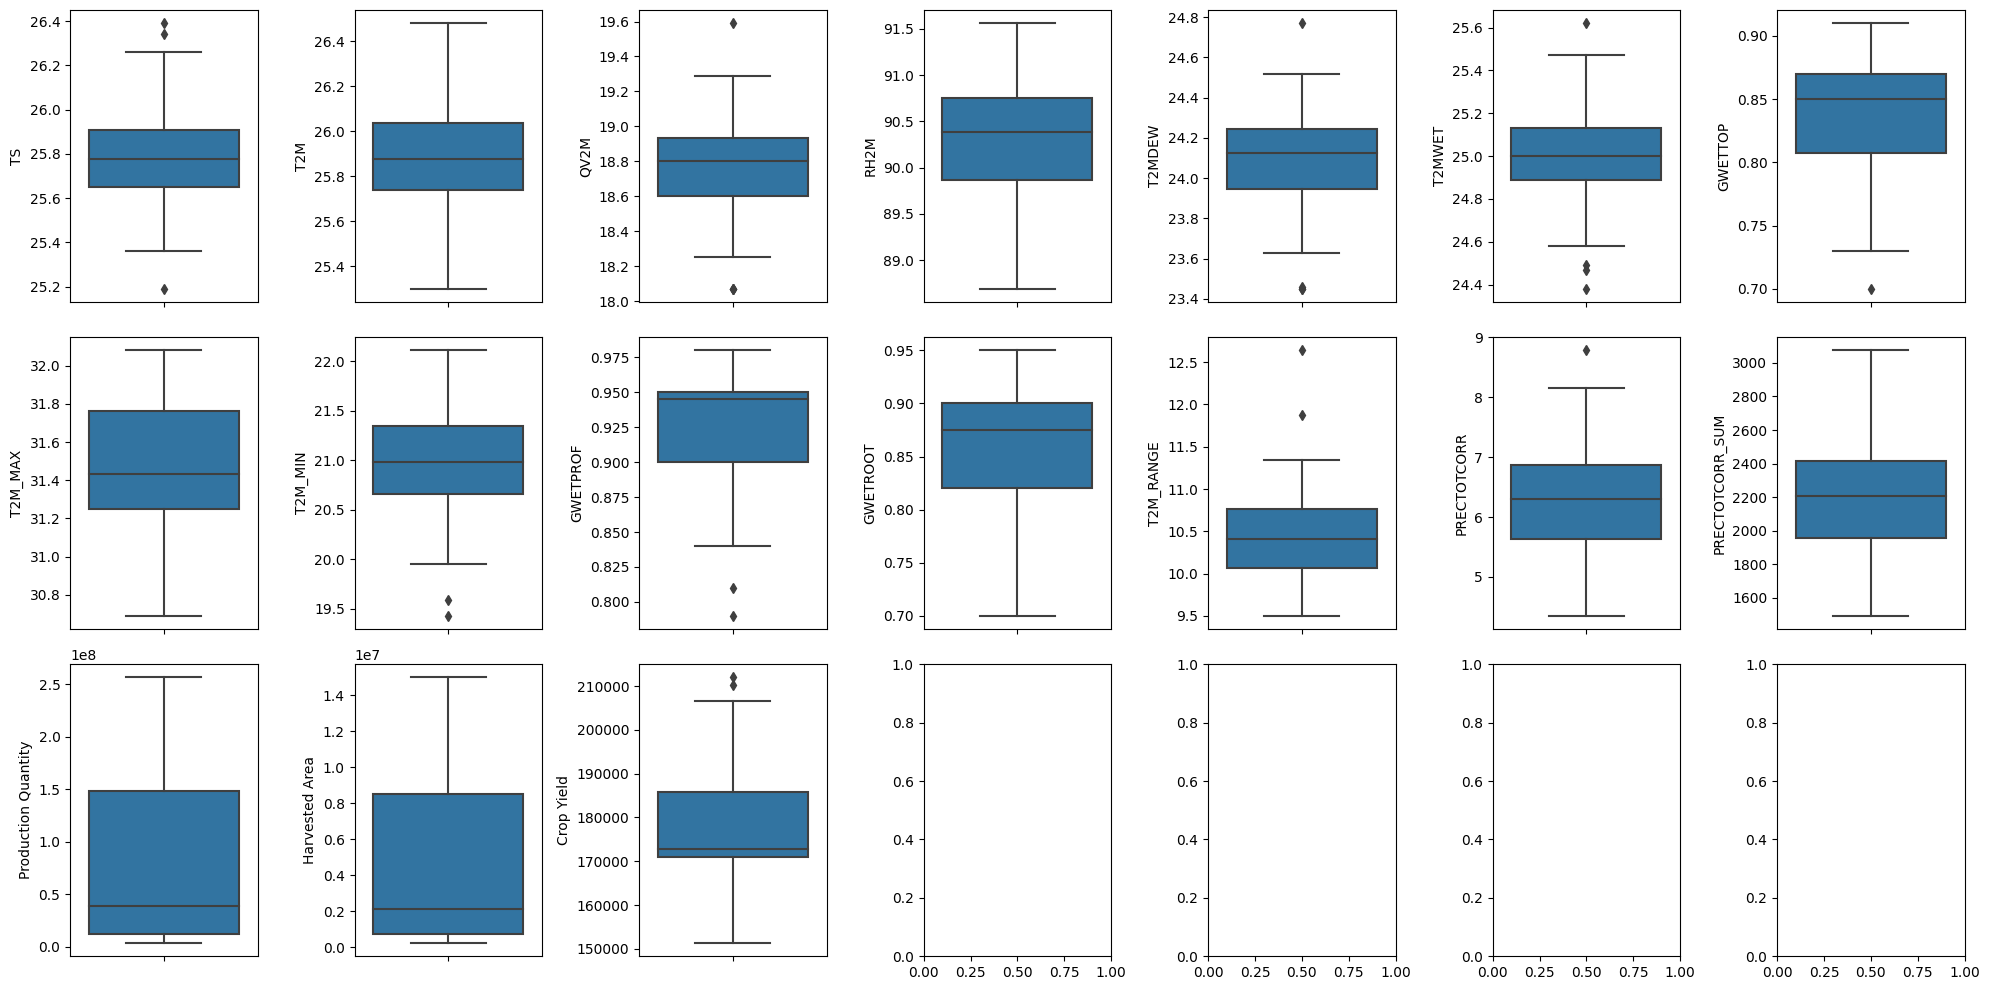

In [138]:
# checking the outliers

fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20, 10))
index=0
axs = axs.flatten()

for k, v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index+=1

plt.tight_layout()

In [139]:
# checking outlier percentage

for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1

    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]

    print('Column {} Outliers {:.2f}%'.format(k, perc))

Column TS Outliers 7.50%
Column T2M Outliers 0.00%
Column QV2M Outliers 10.00%
Column RH2M Outliers 0.00%
Column T2MDEW Outliers 10.00%
Column T2MWET Outliers 10.00%
Column GWETTOP Outliers 2.50%
Column T2M_MAX Outliers 0.00%
Column T2M_MIN Outliers 5.00%
Column GWETPROF Outliers 5.00%
Column GWETROOT Outliers 0.00%
Column T2M_RANGE Outliers 5.00%
Column PRECTOTCORR Outliers 2.50%
Column PRECTOTCORR_SUM Outliers 0.00%
Column Production Quantity Outliers 0.00%
Column Harvested Area Outliers 0.00%
Column Crop Yield Outliers 5.00%


C:\Users\malik\AppData\Local\Temp\ipykernel_292\2482128013.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\malik\AppData\Local\Temp\ipykernel_292\2482128013.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\malik\AppData\Local\Temp\ipyk

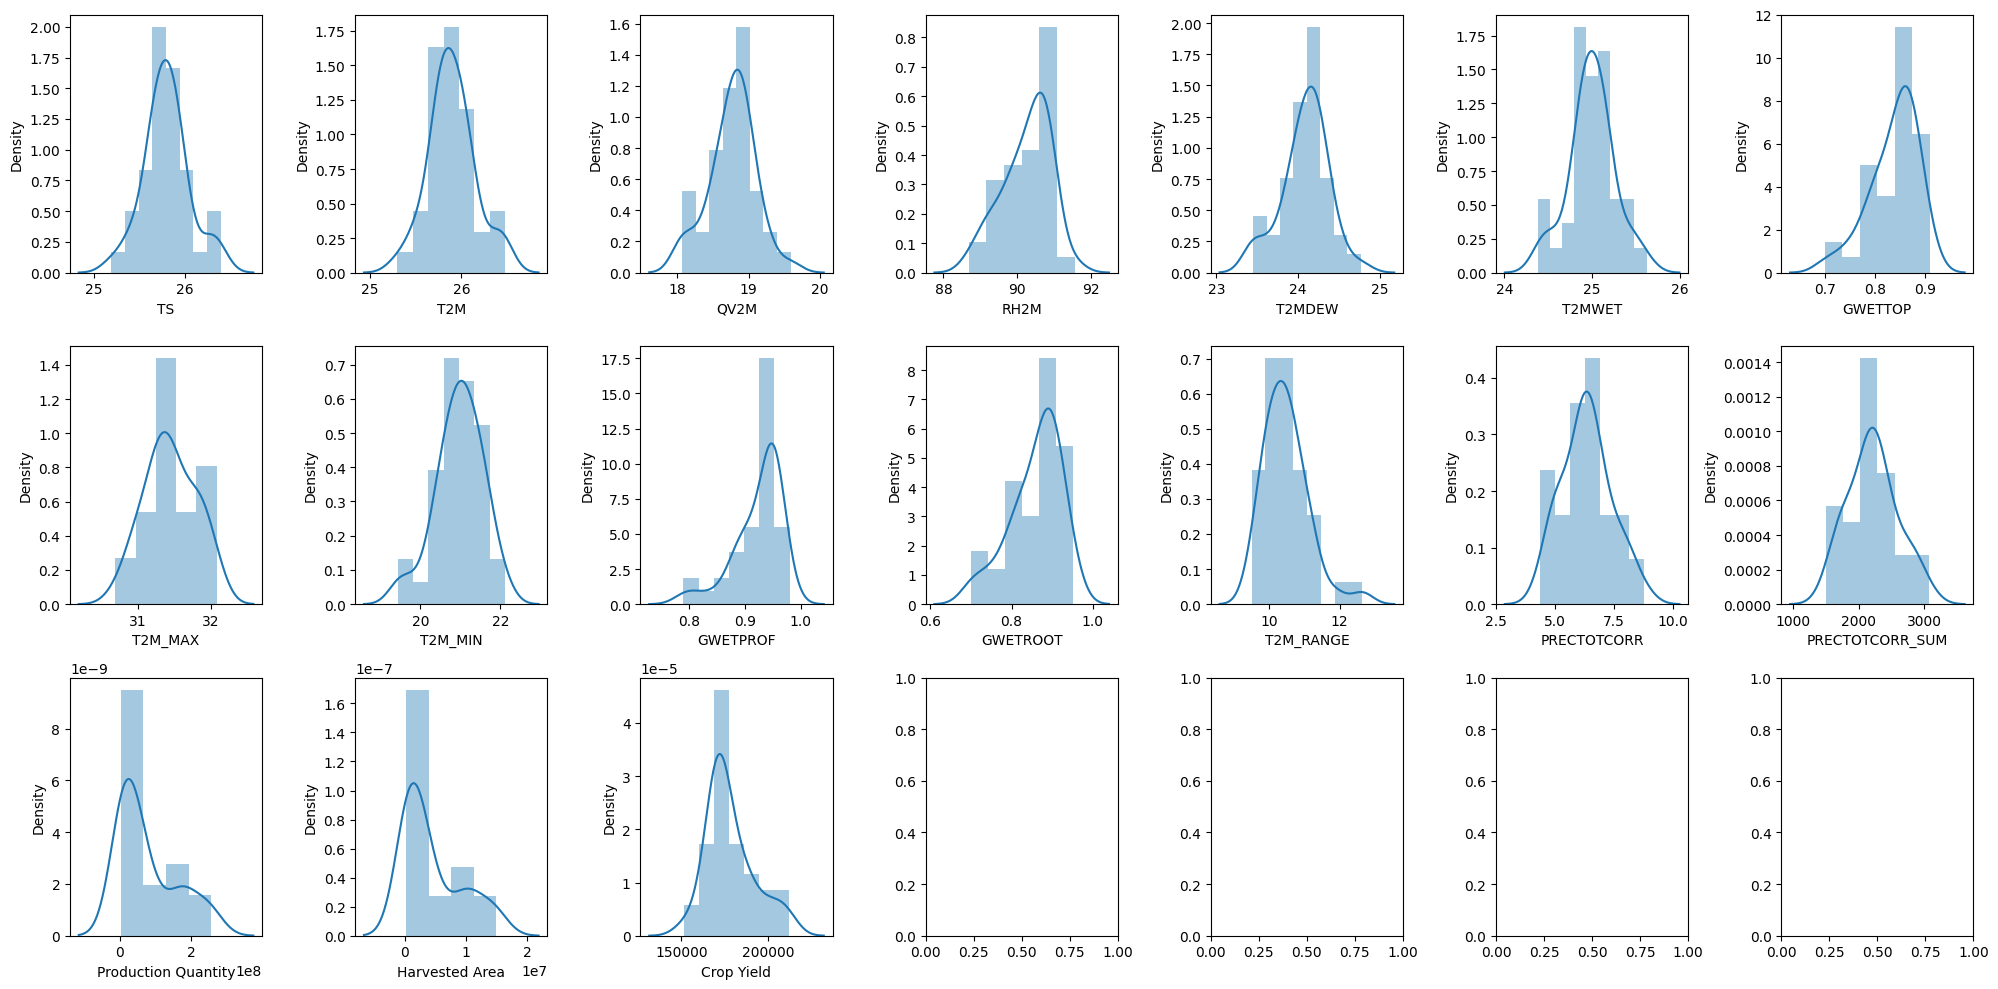

In [140]:
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20,10))
index = 0
axs = axs.flatten()

for k, v in data.items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout()

In [141]:
# checking skewness & kurtosis

index = 0

for k, v in data.items():
  print('Feature {} Skewness = {:.7f}'.format(k, data[k].skew()))
  print('Feature {} Kurtosis = {:.7f}'.format(k, data[k].kurt()))
  index += 1

Feature TS Skewness = 0.2406374
Feature TS Kurtosis = 0.8363698
Feature T2M Skewness = 0.2707823
Feature T2M Kurtosis = 0.5723864
Feature QV2M Skewness = -0.2786897
Feature QV2M Kurtosis = 0.6401117
Feature RH2M Skewness = -0.5879201
Feature RH2M Kurtosis = -0.2071057
Feature T2MDEW Skewness = -0.4444030
Feature T2MDEW Kurtosis = 0.6568880
Feature T2MWET Skewness = -0.0981750
Feature T2MWET Kurtosis = 0.6765944
Feature GWETTOP Skewness = -0.9550889
Feature GWETTOP Kurtosis = 0.7357078
Feature T2M_MAX Skewness = -0.0040353
Feature T2M_MAX Kurtosis = -0.6627789
Feature T2M_MIN Skewness = -0.5514657
Feature T2M_MIN Kurtosis = 0.5227972
Feature GWETPROF Skewness = -1.4980589
Feature GWETPROF Kurtosis = 2.1615314
Feature GWETROOT Skewness = -0.8883621
Feature GWETROOT Kurtosis = 0.3011105
Feature T2M_RANGE Skewness = 1.1899784
Feature T2M_RANGE Kurtosis = 2.4924794
Feature PRECTOTCORR Skewness = 0.2627591
Feature PRECTOTCORR Kurtosis = -0.2596547
Feature PRECTOTCORR_SUM Skewness = 0.2583623

Removing outlier


 mu = 3.29 and sigma = 0.01



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


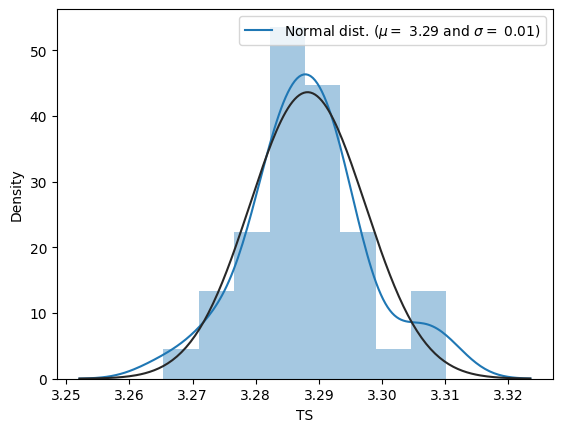

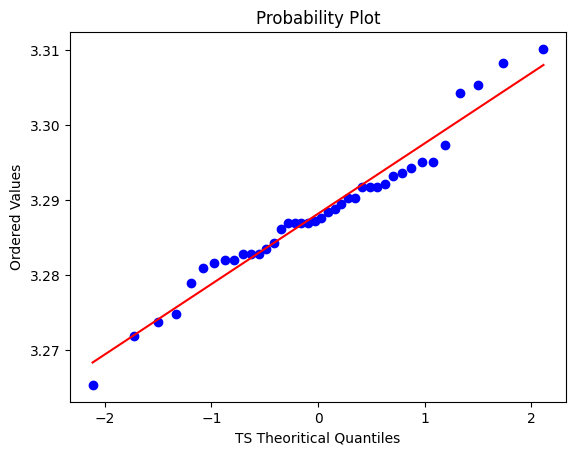


 mu = 3.29 and sigma = 0.01



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


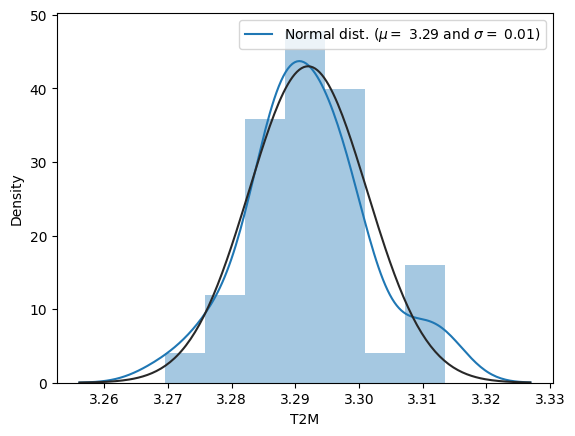

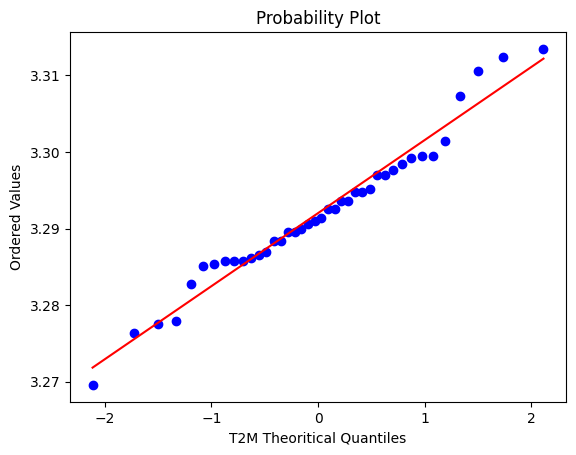

C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)



 mu = 2.98 and sigma = 0.02



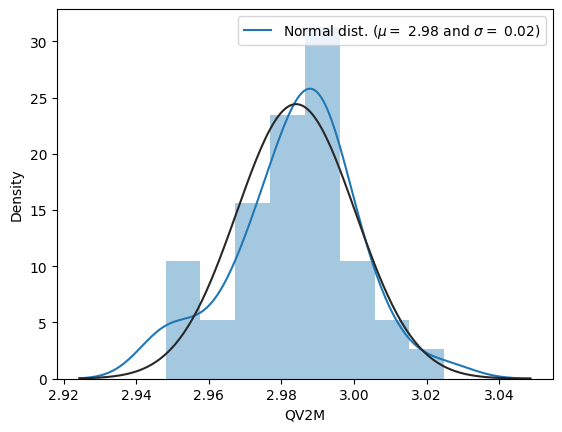

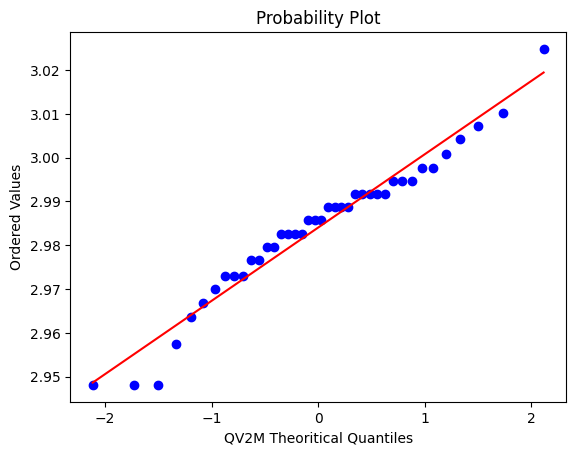


 mu = 4.51 and sigma = 0.01



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


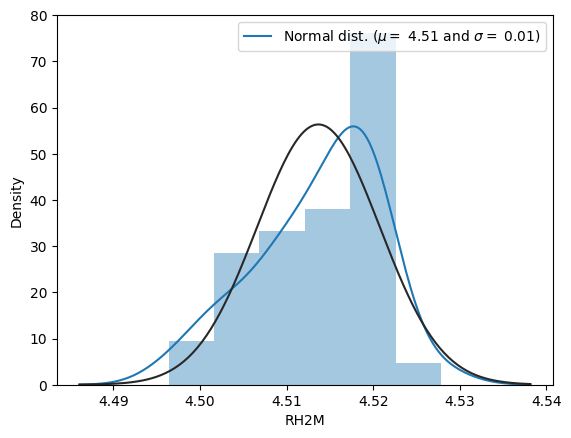

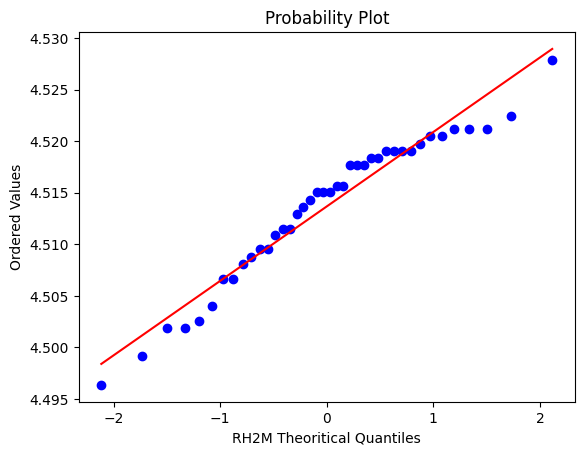


 mu = 3.22 and sigma = 0.01



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


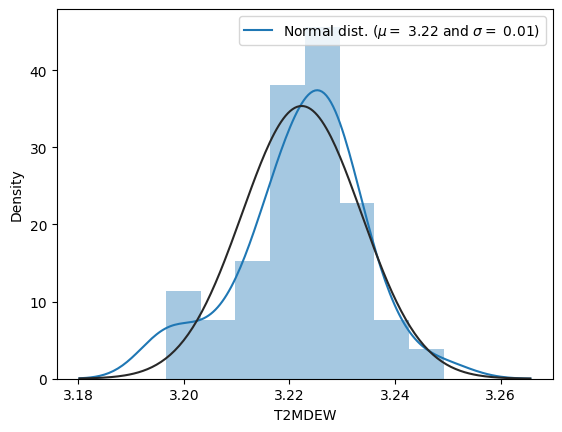

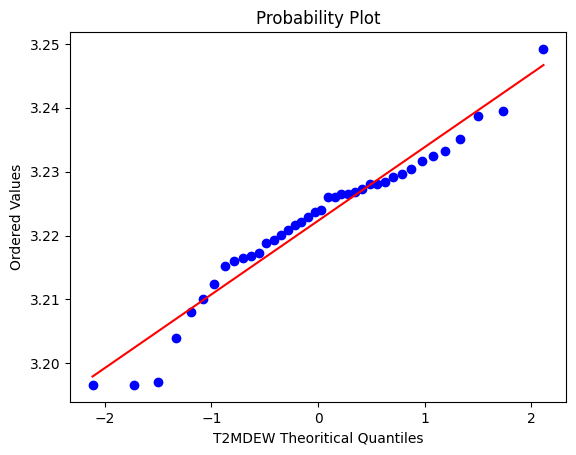


 mu = 3.26 and sigma = 0.01



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


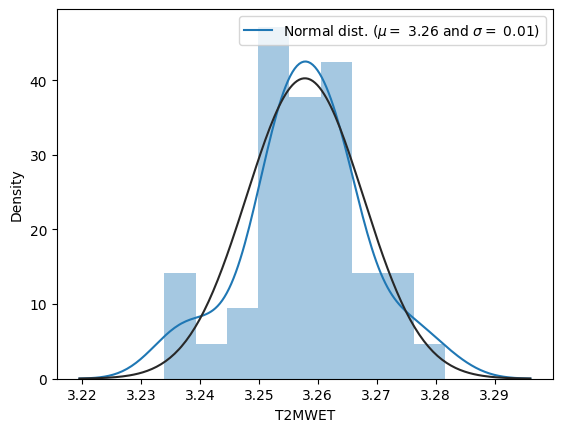

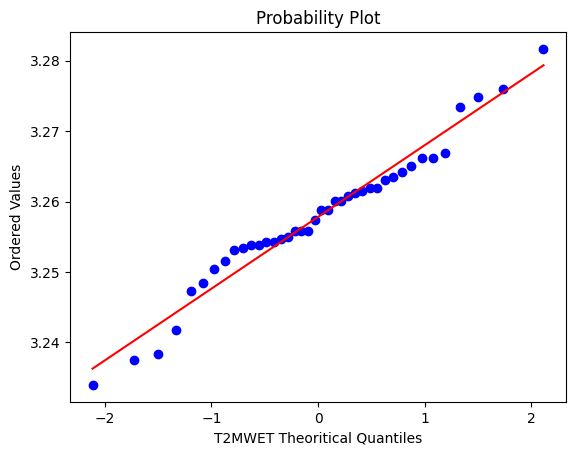


 mu = 0.61 and sigma = 0.03



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


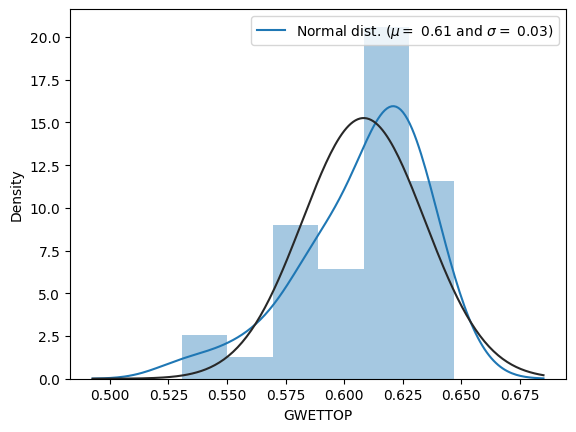

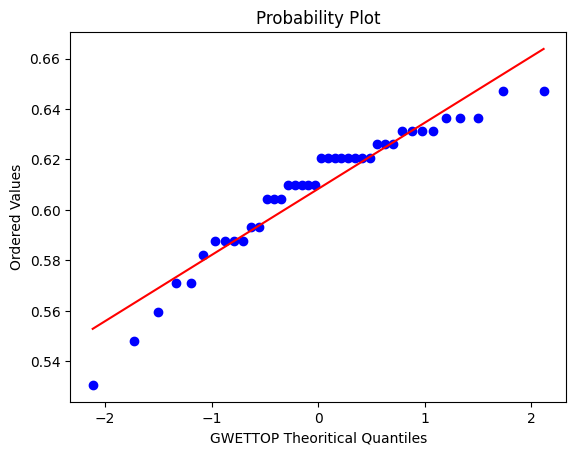


 mu = 3.48 and sigma = 0.01



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


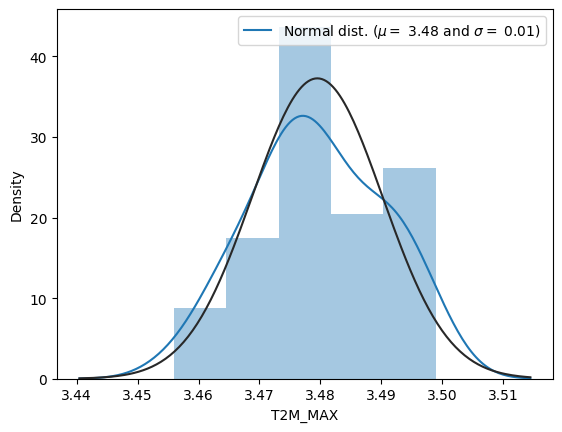

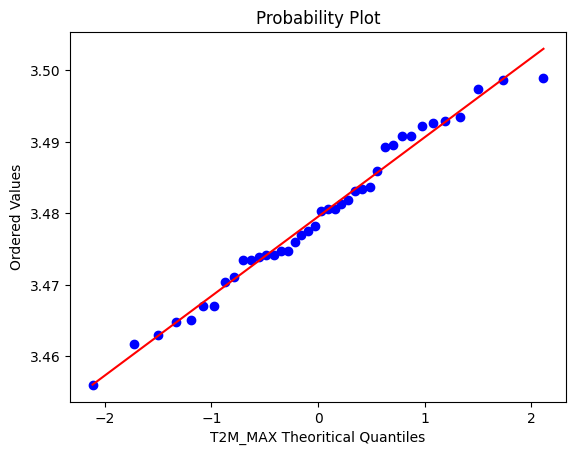


 mu = 3.09 and sigma = 0.03



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


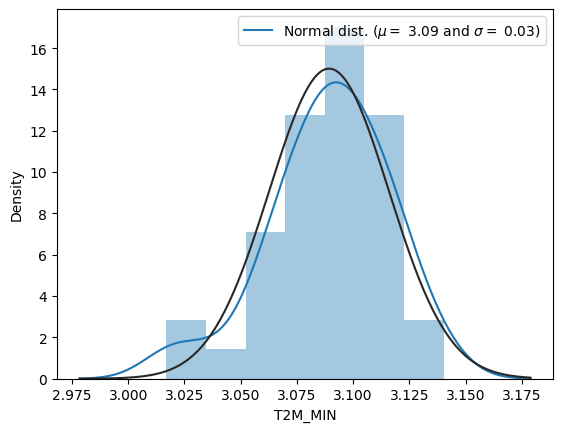

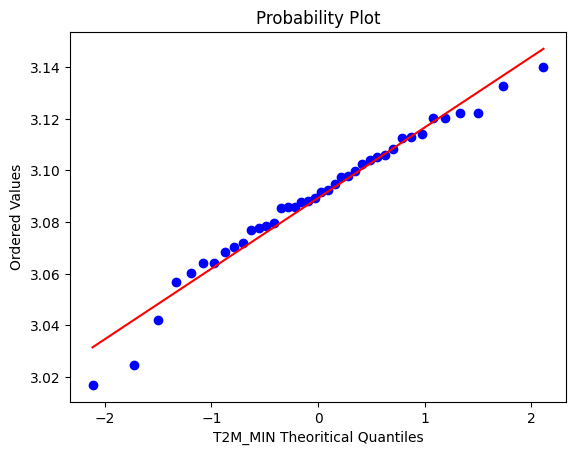


 mu = 0.65 and sigma = 0.02



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


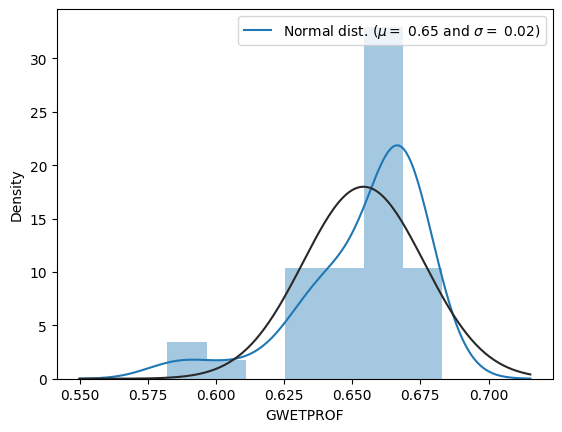

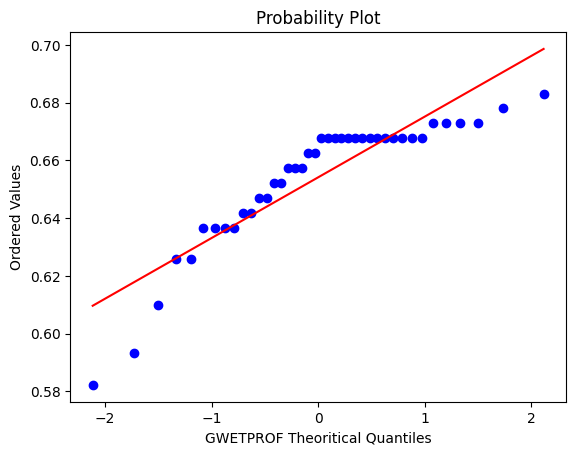


 mu = 0.62 and sigma = 0.03



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


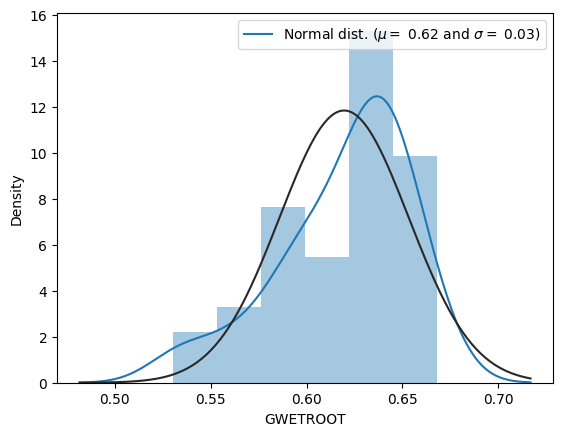

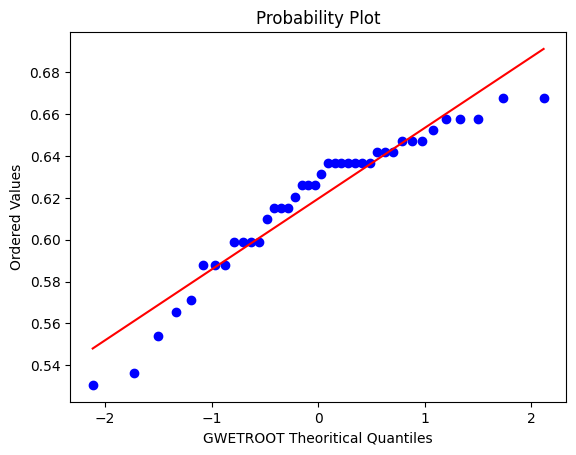


 mu = 2.44 and sigma = 0.05



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


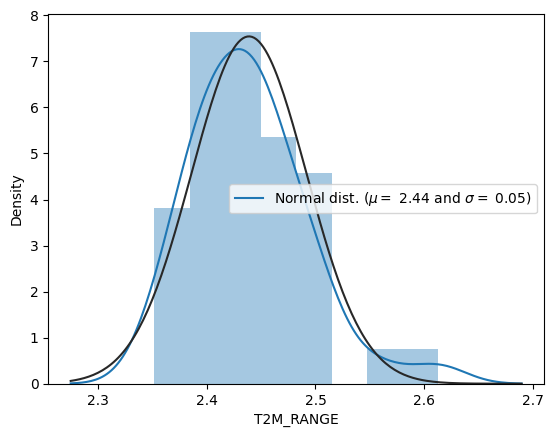

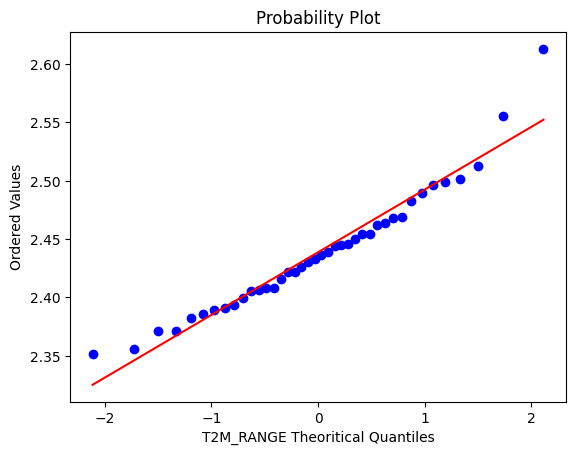


 mu = 1.98 and sigma = 0.14



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


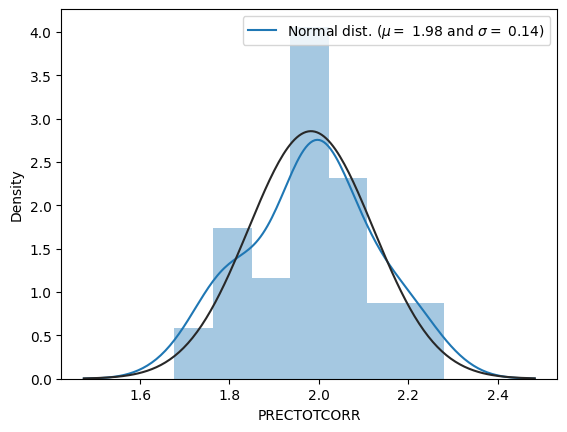

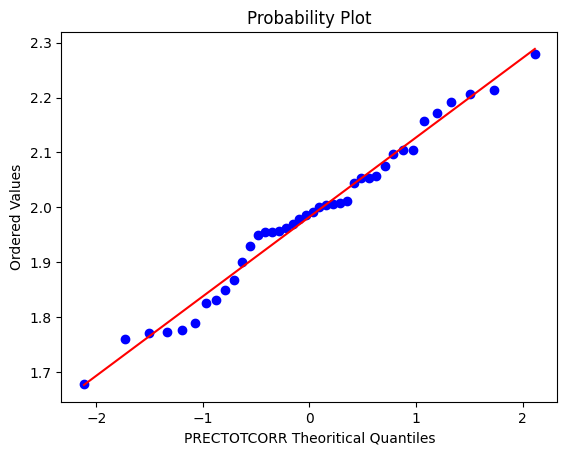


 mu = 7.69 and sigma = 0.17



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


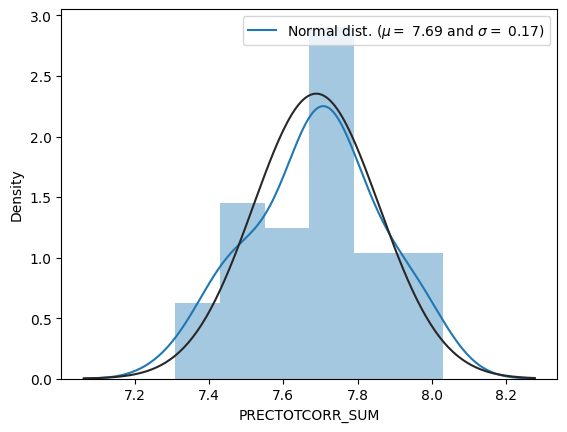

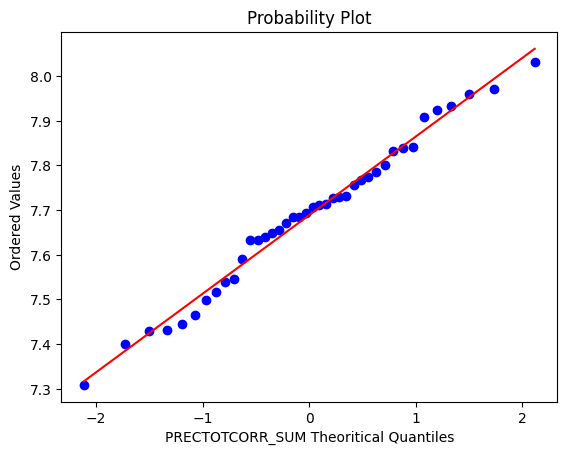


 mu = 2.91 and sigma = 0.07



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


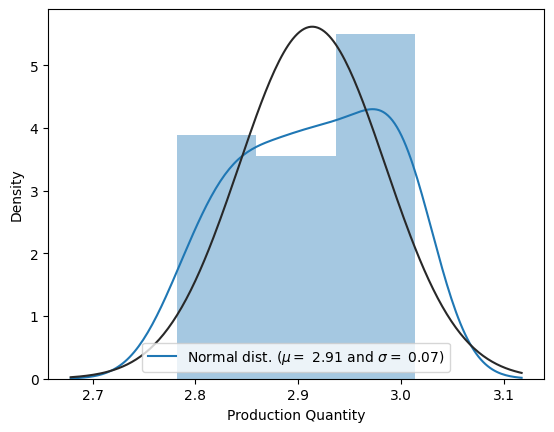

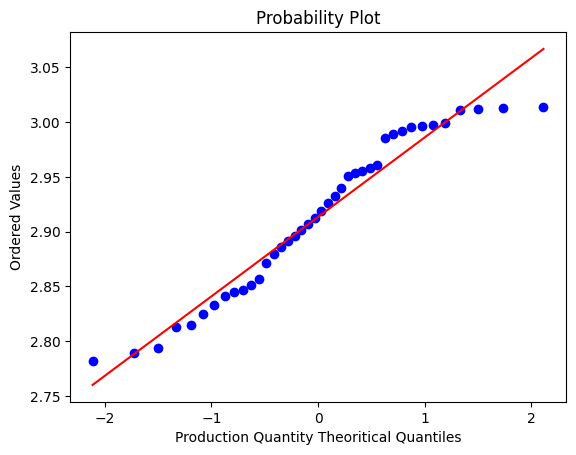


 mu = 2.74 and sigma = 0.09



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


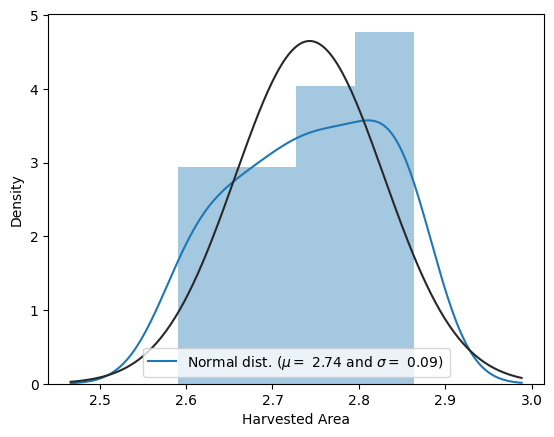

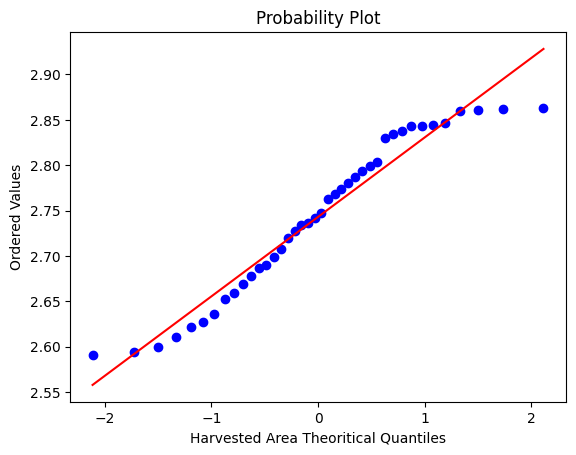


 mu = 12.09 and sigma = 0.07



C:\Users\malik\AppData\Local\Temp\ipykernel_292\1531018006.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


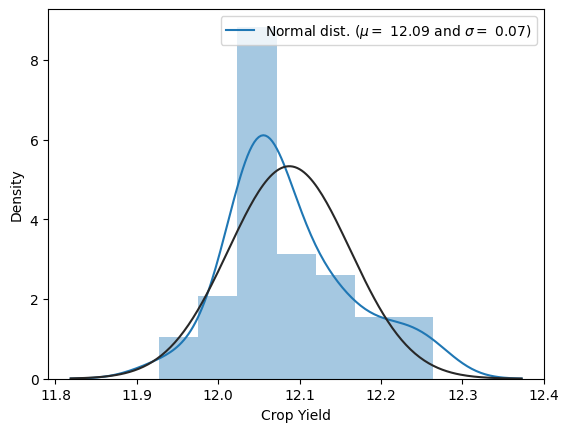

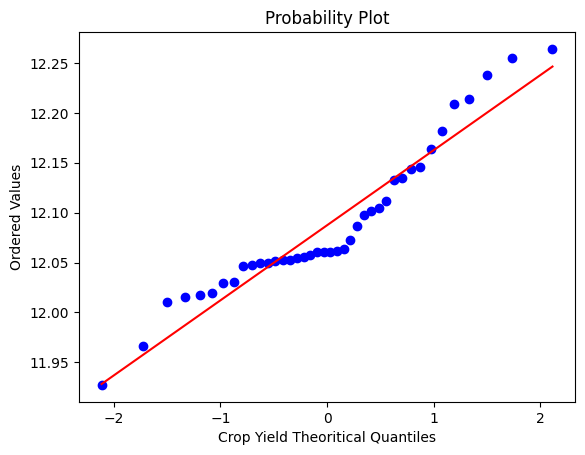

<Figure size 640x480 with 0 Axes>

In [197]:
from scipy import stats
from scipy.stats import norm, skew

data = np.log1p(data)

fig, axs = plt.subplots()
index = 0

for k, v in data.items():
  sns.distplot(data[k], fit=norm)

  (mu, sigma) = norm.fit(data[k])
  print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')

  fig = plt.figure()
  res = stats.probplot(data[k], plot=plt)
  plt.xlabel('{} Theoritical Quantiles'.format(k))
  plt.show()

  index += 1

plt.tight_layout()

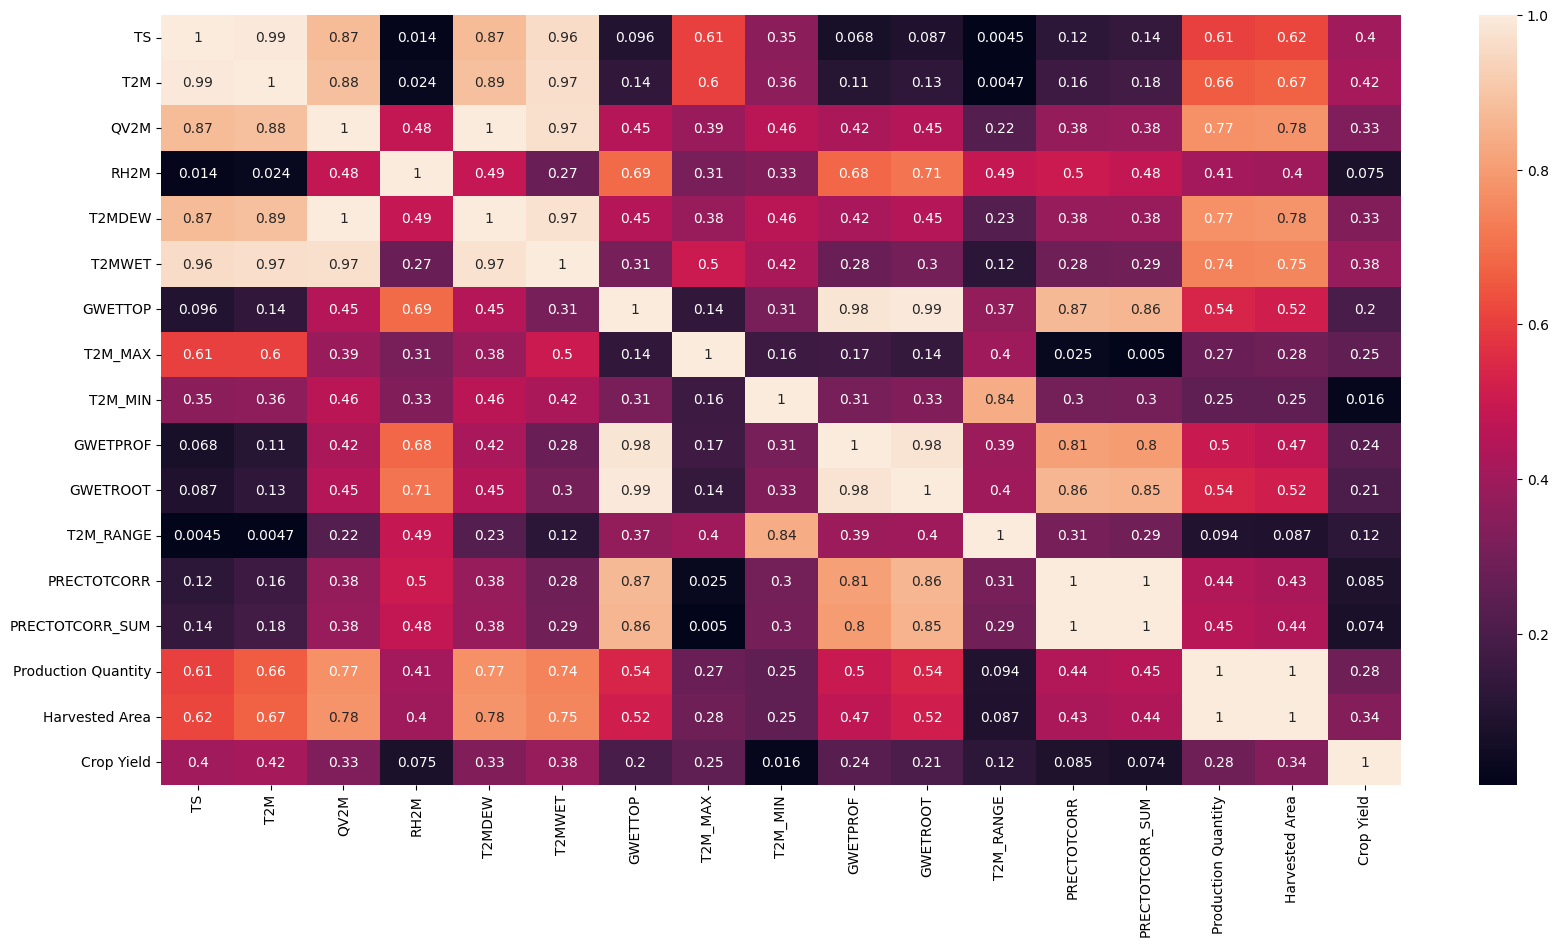

In [198]:
# checking correlation between feature with heatmap

plt.figure(figsize=(20, 10))

cor = data.corr().abs()
sns.heatmap(cor, annot=True)
plt.show()

In [200]:
# only using certain feature with ammount of correlation

cor_target = abs(cor['Crop Yield'])
relevant_features = cor_target[cor_target > 0.2]
feature_names = [index for index, value in relevant_features.iteritems()]

feature_names.remove('Crop Yield')

print(feature_names)
print(len(feature_names))

['TS', 'T2M', 'QV2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'GWETPROF', 'GWETROOT', 'Production Quantity', 'Harvested Area']
10


C:\Users\malik\AppData\Local\Temp\ipykernel_292\2484235399.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  feature_names = [index for index, value in relevant_features.iteritems()]


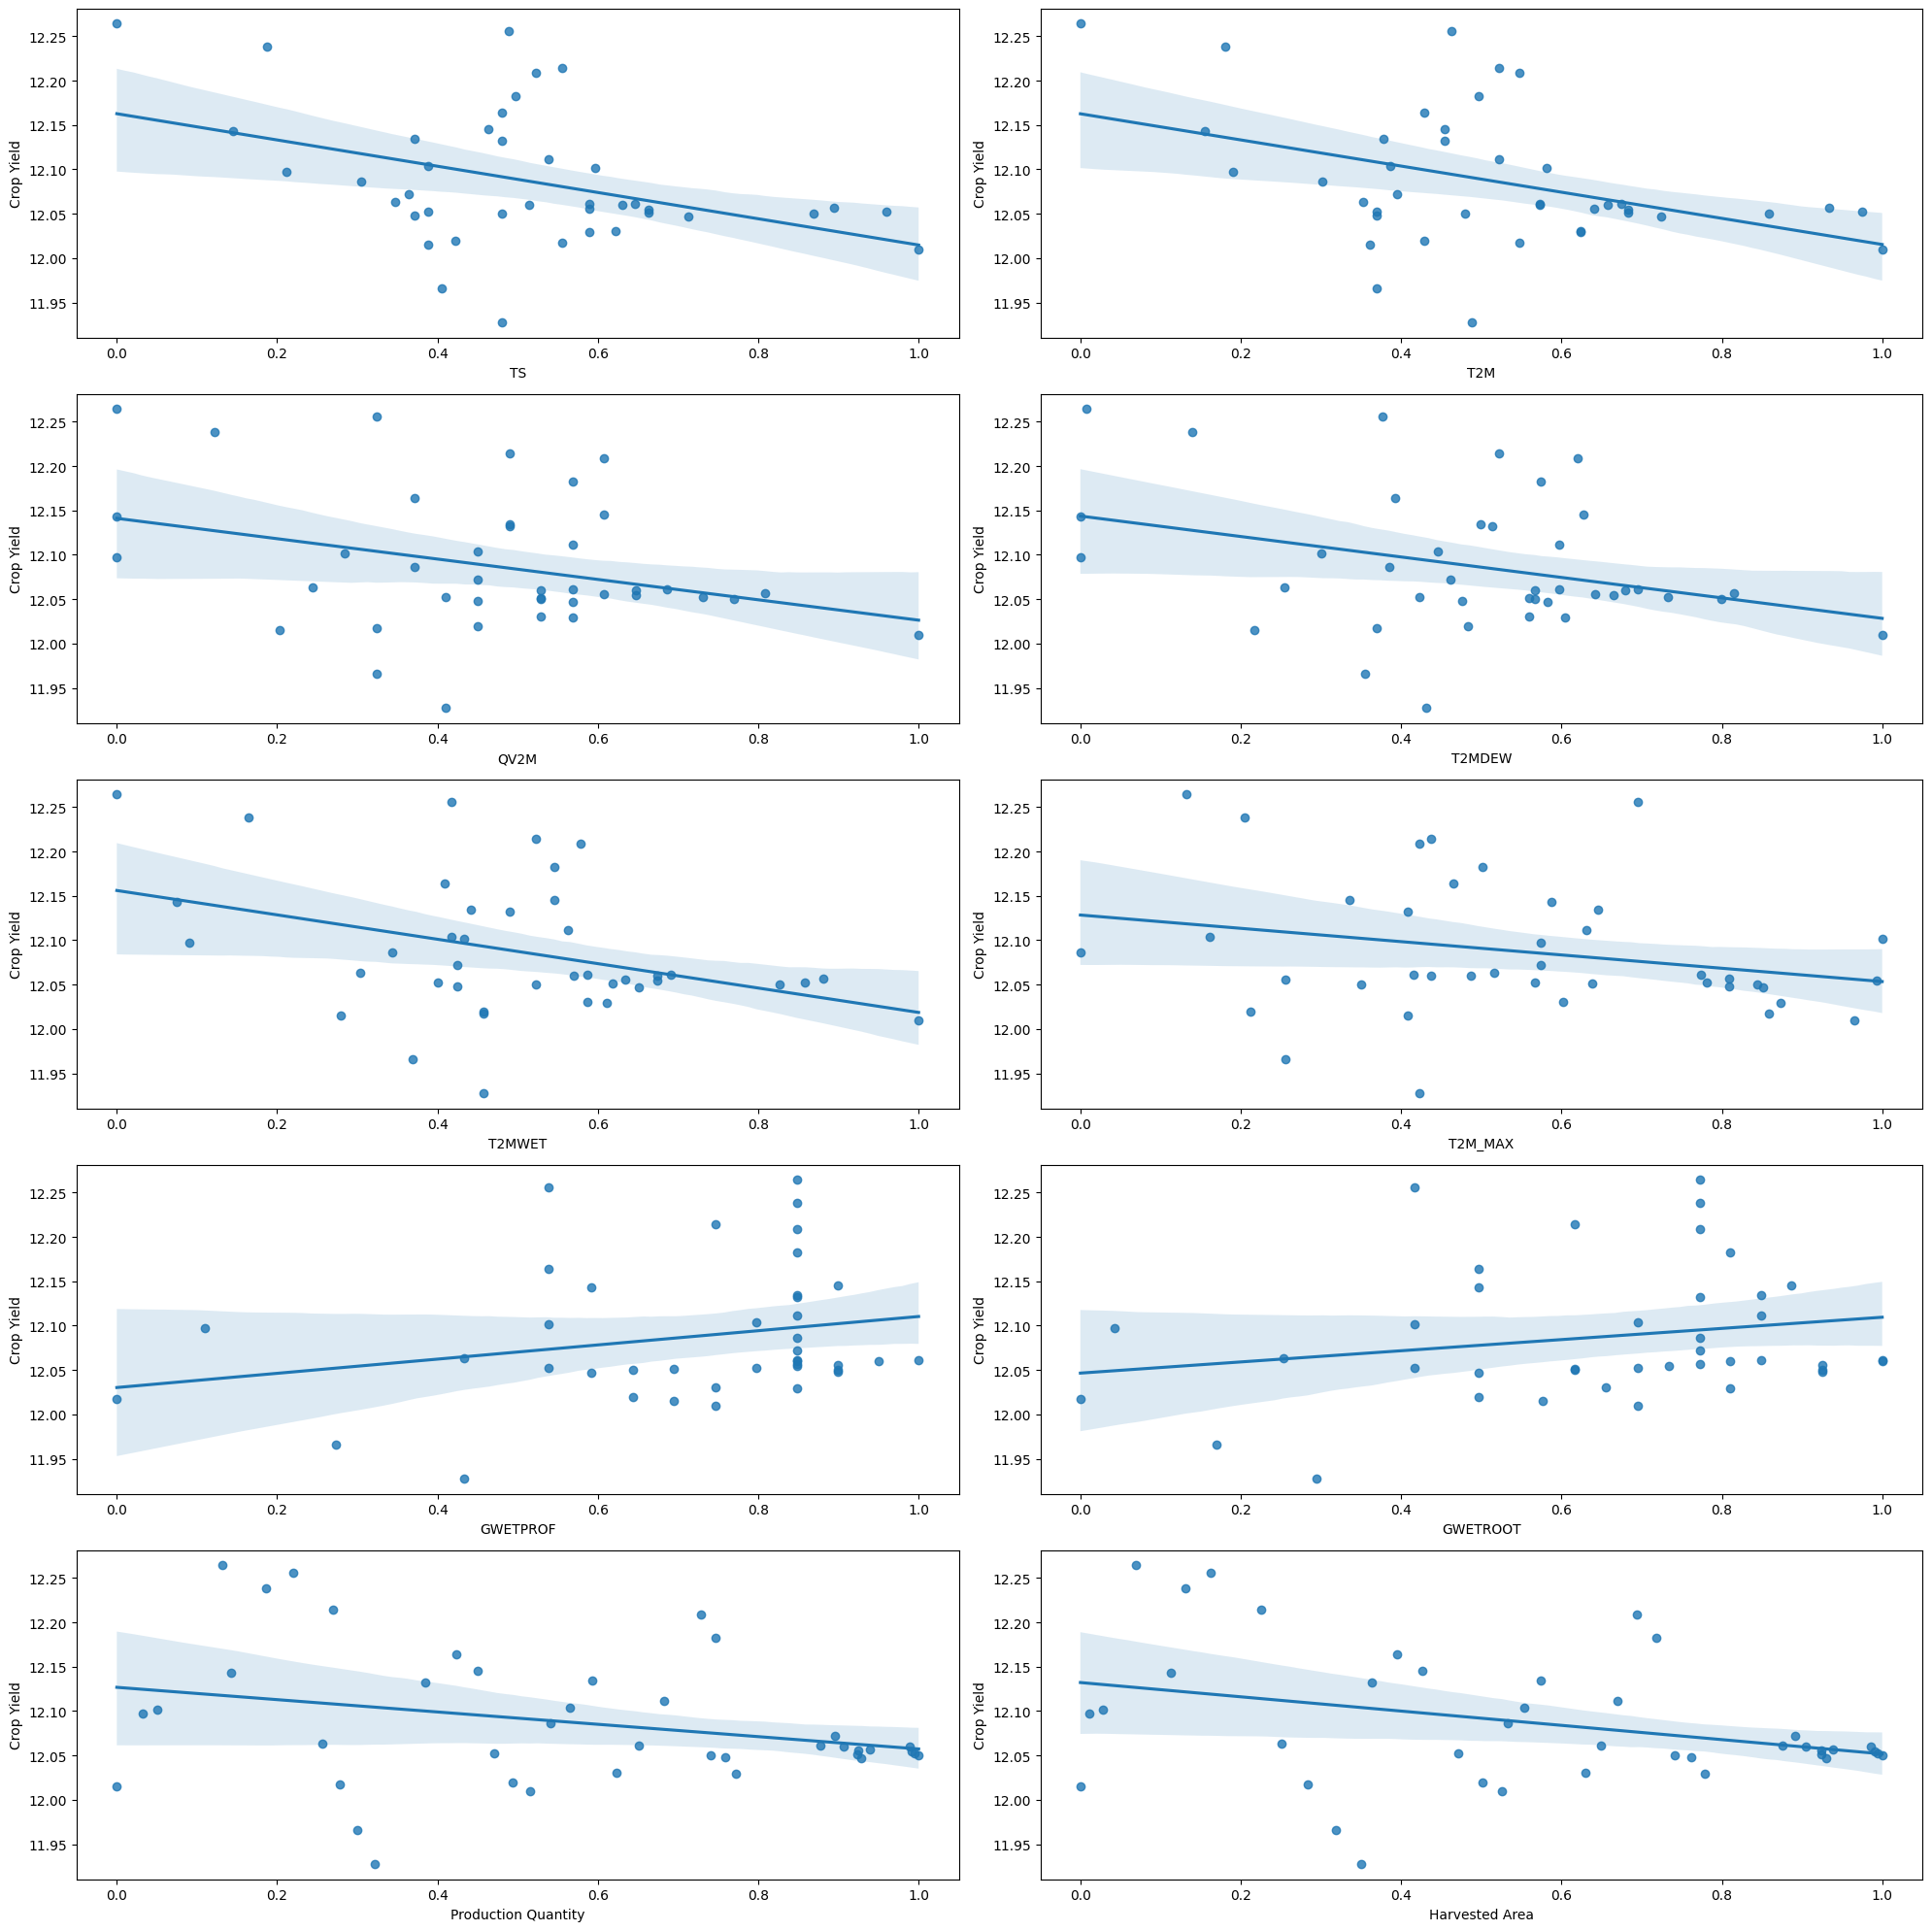

In [204]:
from sklearn import preprocessing

min_max_scaller = preprocessing.MinMaxScaler()
column_cels = feature_names

x = data.loc[:,column_cels]
y = data['Crop Yield']

x = pd.DataFrame(data=min_max_scaller.fit_transform(x), columns=column_cels)
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(20, 20))
index = 0
axs = axs.flatten()

for i, k in enumerate(column_cels):
  sns.regplot(y=y, x=x[k], ax=axs[i])

plt.tight_layout()

In [211]:
# splitting Training and Testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

Decision Tree

In [244]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=0)

decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [245]:
decision_tree_pred = decision_tree.predict(x_test)

In [249]:
from sklearn.metrics import mean_squared_error

metric_eval = {}

mse = mean_squared_error(y_test, decision_tree_pred)
rmse = np.sqrt(mse)
metric_eval['DecisionTree'] = rmse

Ada Boost

In [252]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor()

adaboost.fit(x_train, y_train)

AdaBoostRegressor()

In [253]:
ada_pred = adaboost.predict(x_test)

In [254]:
mse = mean_squared_error(y_test, ada_pred)
rmse = np.sqrt(mse)

metric_eval['AdaBoost'] = rmse

EXTRA TREE

In [257]:
from sklearn.tree import ExtraTreeRegressor

extratree = ExtraTreeRegressor()

extratree.fit(x_train, y_train)

ExtraTreeRegressor()

In [258]:
extra_pred = extratree.predict(x_test)

In [259]:
mse = mean_squared_error(y_test, extra_pred)
rmse = np.sqrt(mse)

metric_eval['ExtraTree'] = rmse

RANDOM FOREST

In [262]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [263]:
random_pred = random_forest.predict(x_test)

In [264]:
mse = mean_squared_error(y_test, random_pred)
rmse = np.sqrt(mse)

metric_eval['RandomForest'] = rmse

GRADIENBOOSTING

In [267]:
from sklearn.ensemble import GradientBoostingRegressor

grad_model = GradientBoostingRegressor()

grad_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [268]:
grad_pred = grad_model.predict(x_test)

In [269]:
mse = mean_squared_error(y_test, grad_pred)
rmse = np.sqrt(mse)

metric_eval['GradientBoosting'] = rmse

ANN

In [278]:
from tensorflow.python.keras.models import sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import regularizers

reg = regularizers.l2(0.01)

model = sequential.Sequential()

model.add(Dense(32, input_shape=(10,), activation='relu', kernel_regularizer=reg))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))

In [279]:
model.compile(optimizer='SGD', loss=['mean_squared_error'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 953
Trainable params: 953
Non-trainable params: 0
_________________________________________________________________


In [280]:
model_result = model.fit(x_train, y_train, epochs=1000, batch_size=20, validation_data=(x_test, y_test), verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 153ms/step - loss: 144.7854 - val_loss: 132.4133
Epoch 2/1000
2/2 [==============================] - 0s 22ms/step - loss: 120.9601 - val_loss: 63.5307
Epoch 3/1000
2/2 [==============================] - 0s 25ms/step - loss: 44.6290 - val_loss: 95.2696
Epoch 4/1000
2/2 [==============================] - 0s 30ms/step - loss: 69.4613 - val_loss: 35.9737
Epoch 5/1000
2/2 [==============================] - 0s 24ms/step - loss: 61.1699 - val_loss: 88.1679
Epoch 6/1000
2/2 [==============================] - 0s 26ms/step - loss: 73.4319 - val_loss: 9.4705
Epoch 7/1000
2/2 [==============================] - 0s 24ms/step - loss: 13.3897 - val_loss: 70.5236
Epoch 8/1000
2/2 [==============================] - 0s 27ms/step - loss: 56.5814 - val_loss: 5.0653
Epoch 9/1000
2/2 [==============================] - 0s 35ms/step - loss: 4.1705 - val_loss: 12.6880
Epoch 10/1000
2/2 [==============================] - 0s 23ms/step - loss: 8.7444 - val_los

In [281]:
from tensorflow.python.keras.losses import MeanSquaredError
from tensorflow.python.keras.metrics import RootMeanSquaredError

mse = MeanSquaredError()
rmse = RootMeanSquaredError()

ann_predict = model.predict(x_test)

predict_mse = mse(y_test, ann_predict).numpy()
predict_rmse = rmse(y_test, ann_predict).numpy()

metric_eval['ANN'] = predict_rmse

METRIC

In [282]:
metric_df = pd.DataFrame(data=metric_eval, index=['RMSE'])
metric_df

,DecisionTree,AdaBoost,ExtraTree,RandomForest,GradientBoosting,ANN
RMSE,0.06511,0.073614,0.084803,0.078395,0.077037,0.075178


Text(0.5, 1.0, 'Evaluasi Model dan Dataset* Lower better')

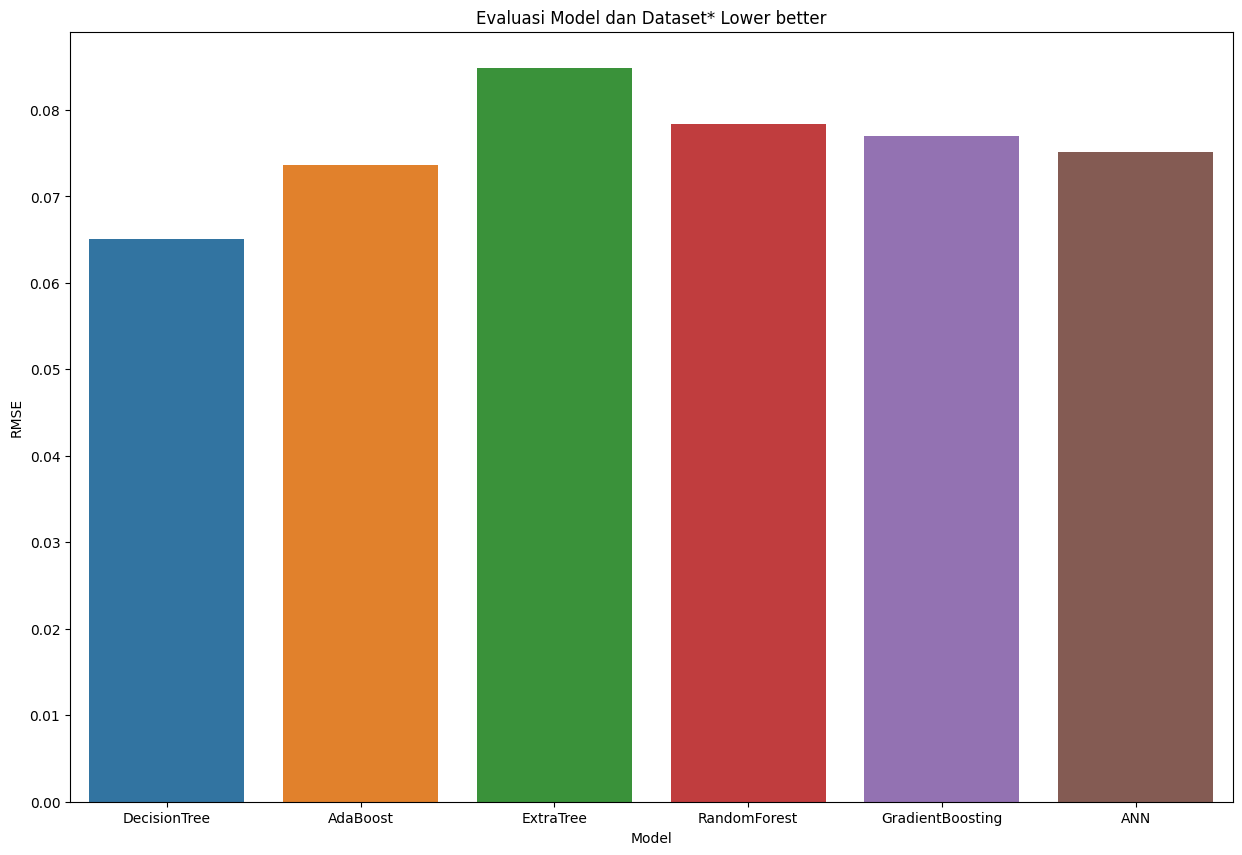

In [283]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=metric_df)

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Evaluasi Model dan Dataset* Lower better')